In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Airlines_Data.csv")
data

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


<AxesSubplot:>

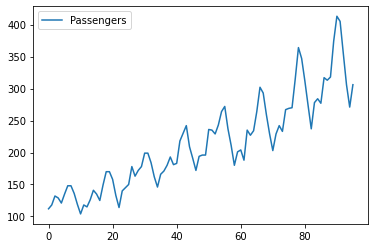

In [3]:
data.plot()

In [4]:
data["t"] = np.arange(1,97)
data["t_squared"] = data["t"]*data["t"]
data.columns
data["log_data"] = np.log(data["Passengers"])
data.rename(columns={"Passengers ": 'Passengers'}, inplace=True)

In [5]:
data

,Month,Passengers,t,t_squared,log_data
0,Jan-95,112,1,1,4.718499
1,Feb-95,118,2,4,4.770685
2,Mar-95,132,3,9,4.882802
3,Apr-95,129,4,16,4.859812
4,May-95,121,5,25,4.795791
...,...,...,...,...,...
91,Aug-02,405,92,8464,6.003887
92,Sep-02,355,93,8649,5.872118
93,Oct-02,306,94,8836,5.723585
94,Nov-02,271,95,9025,5.602119


In [6]:
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
import numpy as np
p = data["Month"][0]
p[0:3]
data['months']=0
for i in range(96):
    p = data["Month"][i]
    data['months'][i]= p[0:3]

<ipython-input-6-291725faa9ed>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['months'][i]= p[0:3]
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [7]:
month_dummies = pd.DataFrame(pd.get_dummies(data['months']))
data1 = pd.concat([data,month_dummies],axis = 1)

In [8]:
data1

,Month,Passengers,t,t_squared,log_data,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan-95,112,1,1,4.718499,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb-95,118,2,4,4.770685,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar-95,132,3,9,4.882802,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr-95,129,4,16,4.859812,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,May-95,121,5,25,4.795791,May,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug-02,405,92,8464,6.003887,Aug,0,1,0,0,0,0,0,0,0,0,0,0
92,Sep-02,355,93,8649,5.872118,Sep,0,0,0,0,0,0,0,0,0,0,0,1
93,Oct-02,306,94,8836,5.723585,Oct,0,0,0,0,0,0,0,0,0,0,1,0
94,Nov-02,271,95,9025,5.602119,Nov,0,0,0,0,0,0,0,0,0,1,0,0


In [9]:
data1["Date"] = pd.to_datetime(data1.Month,format="%b-%y")
data1["month"] = data1.Date.dt.strftime("%b") # month extraction
data1["year"] = data1.Date.dt.strftime("%Y") # year extraction

In [10]:
data1

,Month,Passengers,t,t_squared,log_data,months,Apr,Aug,Dec,Feb,...,Jul,Jun,Mar,May,Nov,Oct,Sep,Date,month,year
0,Jan-95,112,1,1,4.718499,Jan,0,0,0,0,...,0,0,0,0,0,0,0,1995-01-01,Jan,1995
1,Feb-95,118,2,4,4.770685,Feb,0,0,0,1,...,0,0,0,0,0,0,0,1995-02-01,Feb,1995
2,Mar-95,132,3,9,4.882802,Mar,0,0,0,0,...,0,0,1,0,0,0,0,1995-03-01,Mar,1995
3,Apr-95,129,4,16,4.859812,Apr,1,0,0,0,...,0,0,0,0,0,0,0,1995-04-01,Apr,1995
4,May-95,121,5,25,4.795791,May,0,0,0,0,...,0,0,0,1,0,0,0,1995-05-01,May,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug-02,405,92,8464,6.003887,Aug,0,1,0,0,...,0,0,0,0,0,0,0,2002-08-01,Aug,2002
92,Sep-02,355,93,8649,5.872118,Sep,0,0,0,0,...,0,0,0,0,0,0,1,2002-09-01,Sep,2002
93,Oct-02,306,94,8836,5.723585,Oct,0,0,0,0,...,0,0,0,0,0,1,0,2002-10-01,Oct,2002
94,Nov-02,271,95,9025,5.602119,Nov,0,0,0,0,...,0,0,0,0,1,0,0,2002-11-01,Nov,2002


# Upsampling Data

In [11]:
# upsample to daily intervals
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

<ipython-input-11-a4b3d7251530>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [12]:
series= read_csv("C:\\Users\\DELL\\OneDrive\\Desktop\\Airlines_Data.csv")
series

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


In [13]:
series["Date"] = pd.to_datetime(data.Month,format="%b-%y")
series

,Month,Passengers,Date
0,Jan-95,112,1995-01-01
1,Feb-95,118,1995-02-01
2,Mar-95,132,1995-03-01
3,Apr-95,129,1995-04-01
4,May-95,121,1995-05-01
...,...,...,...
91,Aug-02,405,2002-08-01
92,Sep-02,355,2002-09-01
93,Oct-02,306,2002-10-01
94,Nov-02,271,2002-11-01


In [14]:
series = series.drop({'Month'},axis = 1)
series

,Passengers,Date
0,112,1995-01-01
1,118,1995-02-01
2,132,1995-03-01
3,129,1995-04-01
4,121,1995-05-01
...,...,...
91,405,2002-08-01
92,355,2002-09-01
93,306,2002-10-01
94,271,2002-11-01


In [15]:
series = series.set_index("Date")
series

,Passengers
Date,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [16]:
upsampled = series.resample('D').mean()
print(upsampled.head(32))

            Passengers
Date                  
1995-01-01       112.0
1995-01-02         NaN
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-07         NaN
1995-01-08         NaN
1995-01-09         NaN
1995-01-10         NaN
1995-01-11         NaN
1995-01-12         NaN
1995-01-13         NaN
1995-01-14         NaN
1995-01-15         NaN
1995-01-16         NaN
1995-01-17         NaN
1995-01-18         NaN
1995-01-19         NaN
1995-01-20         NaN
1995-01-21         NaN
1995-01-22         NaN
1995-01-23         NaN
1995-01-24         NaN
1995-01-25         NaN
1995-01-26         NaN
1995-01-27         NaN
1995-01-28         NaN
1995-01-29         NaN
1995-01-30         NaN
1995-01-31         NaN
1995-02-01       118.0


# interpolate the missing value

            Passengers
Date                  
1995-01-01  112.000000
1995-01-02  112.193548
1995-01-03  112.387097
1995-01-04  112.580645
1995-01-05  112.774194
1995-01-06  112.967742
1995-01-07  113.161290
1995-01-08  113.354839
1995-01-09  113.548387
1995-01-10  113.741935
1995-01-11  113.935484
1995-01-12  114.129032
1995-01-13  114.322581
1995-01-14  114.516129
1995-01-15  114.709677
1995-01-16  114.903226
1995-01-17  115.096774
1995-01-18  115.290323
1995-01-19  115.483871
1995-01-20  115.677419
1995-01-21  115.870968
1995-01-22  116.064516
1995-01-23  116.258065
1995-01-24  116.451613
1995-01-25  116.645161
1995-01-26  116.838710
1995-01-27  117.032258
1995-01-28  117.225806
1995-01-29  117.419355
1995-01-30  117.612903
1995-01-31  117.806452
1995-02-01  118.000000


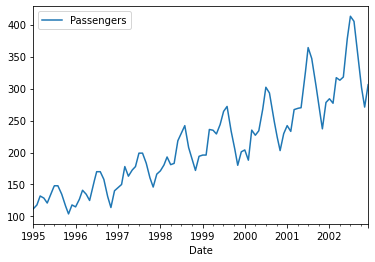

In [17]:
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
pyplot.show()

# Downsampling Data

In [18]:
# downsample to quarterly intervals
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

<ipython-input-18-fc207076a1de>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [19]:
resample = series.resample('Q')
quarterly_mean_sales = resample.mean()

# Tranformations

In [20]:
# load and plot a time series
from pandas import read_csv
from matplotlib import pyplot
import numpy as np

In [21]:
series = read_csv("C:\\Users\\DELL\\OneDrive\\Desktop\\Airlines_Data.csv")

In [22]:
series

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


In [23]:
series["Date"] = pd.to_datetime(data.Month,format="%b-%y")
series

,Month,Passengers,Date
0,Jan-95,112,1995-01-01
1,Feb-95,118,1995-02-01
2,Mar-95,132,1995-03-01
3,Apr-95,129,1995-04-01
4,May-95,121,1995-05-01
...,...,...,...
91,Aug-02,405,2002-08-01
92,Sep-02,355,2002-09-01
93,Oct-02,306,2002-10-01
94,Nov-02,271,2002-11-01


In [24]:
series = series.drop({'Month'},axis = 1)
series
series = series.set_index("Date")
series

,Passengers
Date,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


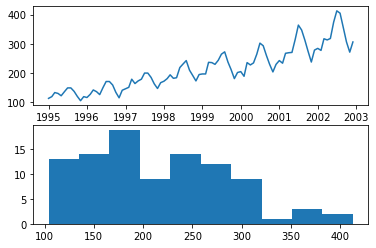

In [25]:
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

# Square Root Transform

In [26]:
from pandas import read_csv
from pandas import DataFrame
from numpy import sqrt
from matplotlib import pyplot

In [27]:
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = sqrt(dataframe['passengers'])

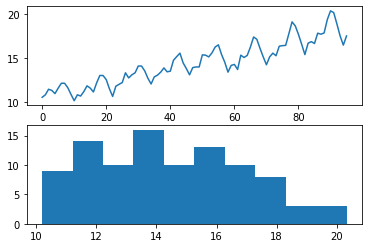

In [28]:
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

# Log Transform

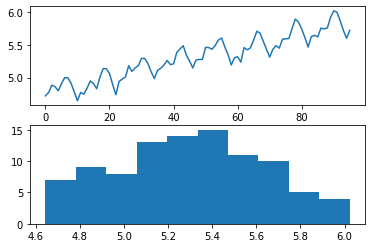

In [29]:
from numpy import log
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = log(dataframe['passengers'])

# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

            Passengers
Date                  
1995-03-31  120.666667
1995-06-30  128.333333
1995-09-30  144.000000
1995-12-31  113.666667
1996-03-31  127.333333


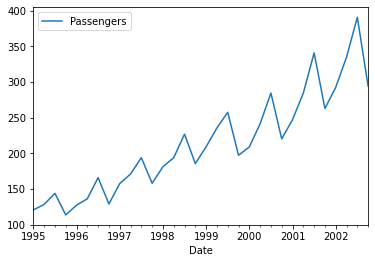

In [30]:
print(quarterly_mean_sales.head())
quarterly_mean_sales.plot()
pyplot.show()

<AxesSubplot:xlabel='month', ylabel='year'>

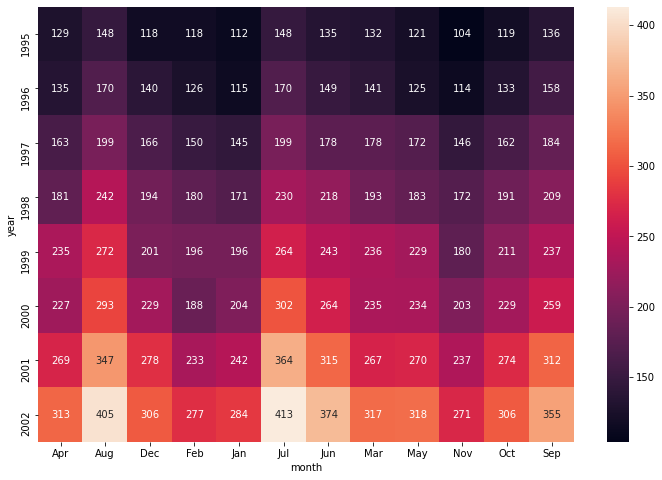

In [31]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=data1,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

<AxesSubplot:xlabel='year', ylabel='Passengers'>

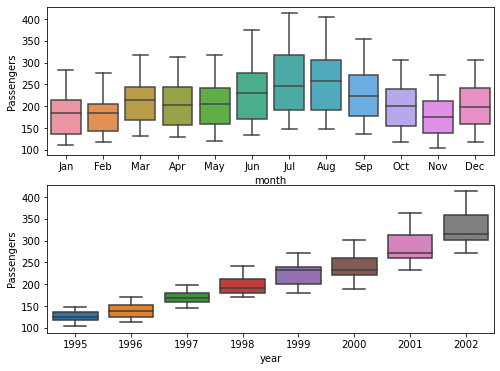

In [32]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=data1)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=data1)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

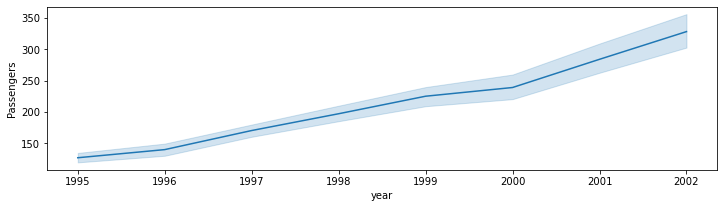

In [33]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=data1)

# Splitting data

In [34]:
Train = data1.head(84)
Test = data1.tail(12)

In [35]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

53.199236534802715

In [36]:
#Exponential

Exp = smf.ols('log_data~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

46.0573611031562

In [37]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

48.051888979330975

In [38]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.8197848142182

In [39]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

26.360817612086503

In [40]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_data~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

140.06320204708638

In [41]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_data~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

10.519172544323617

In [42]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,10.519173
4,rmse_add_sea_quad,26.360818
1,rmse_Exp,46.057361
2,rmse_Quad,48.051889
0,rmse_linear,53.199237
3,rmse_add_sea,132.819785
5,rmse_Mult_sea,140.063202


# Predict for new time period

In [43]:
predict_data = pd.read_csv("Predict_data.csv")
predict_data

,Month
0,3-Jan
1,3-Feb
2,3-Mar
3,3-Apr
4,3-May
5,3-Jun
6,3-Jul
7,3-Aug
8,3-Sep
9,3-Oct


In [44]:
t = np.arange(97,109)
t

array([ 97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108])

In [45]:
t_square = t*t
t_square

array([ 9409,  9604,  9801, 10000, 10201, 10404, 10609, 10816, 11025,
       11236, 11449, 11664])

In [46]:
df = {'t':t,'t_square':t_square}
value = pd.DataFrame(df)
value

,t,t_square
0,97,9409
1,98,9604
2,99,9801
3,100,10000
4,101,10201
5,102,10404
6,103,10609
7,104,10816
8,105,11025
9,106,11236


In [47]:
month = pd.date_range(start = '1/1/2003',end = '12/1/2003',freq = 'MS')
month

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01', '2003-11-01', '2003-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [48]:
Month = pd.DataFrame(month,columns = ['Date'])
Month

,Date
0,2003-01-01
1,2003-02-01
2,2003-03-01
3,2003-04-01
4,2003-05-01
5,2003-06-01
6,2003-07-01
7,2003-08-01
8,2003-09-01
9,2003-10-01


In [49]:
predict_data = pd.concat([Month,value],axis = 1)
predict_data

,Date,t,t_square
0,2003-01-01,97,9409
1,2003-02-01,98,9604
2,2003-03-01,99,9801
3,2003-04-01,100,10000
4,2003-05-01,101,10201
5,2003-06-01,102,10404
6,2003-07-01,103,10609
7,2003-08-01,104,10816
8,2003-09-01,105,11025
9,2003-10-01,106,11236


In [50]:
predict_data['Day'] =predict_data['Date'].dt.strftime('%d')
predict_data['month'] = predict_data['Date'].dt.strftime('%b')
predict_data['year'] = predict_data['Date'].dt.strftime('%y')
predict_data

,Date,t,t_square,Day,month,year
0,2003-01-01,97,9409,01,Jan,03
1,2003-02-01,98,9604,01,Feb,03
2,2003-03-01,99,9801,01,Mar,03
3,2003-04-01,100,10000,01,Apr,03
4,2003-05-01,101,10201,01,May,03
5,2003-06-01,102,10404,01,Jun,03
6,2003-07-01,103,10609,01,Jul,03
7,2003-08-01,104,10816,01,Aug,03
8,2003-09-01,105,11025,01,Sep,03
9,2003-10-01,106,11236,01,Oct,03


In [51]:
month_dummy = pd.get_dummies(predict_data['month'])
month_dummy

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,1,0


In [52]:
final_data = pd.concat([predict_data,month_dummy],axis = 1)
final_data

,Date,t,t_square,Day,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2003-01-01,97,9409,01,Jan,03,0,0,0,0,1,0,0,0,0,0,0,0
1,2003-02-01,98,9604,01,Feb,03,0,0,0,1,0,0,0,0,0,0,0,0
2,2003-03-01,99,9801,01,Mar,03,0,0,0,0,0,0,0,1,0,0,0,0
3,2003-04-01,100,10000,01,Apr,03,1,0,0,0,0,0,0,0,0,0,0,0
4,2003-05-01,101,10201,01,May,03,0,0,0,0,0,0,0,0,1,0,0,0
5,2003-06-01,102,10404,01,Jun,03,0,0,0,0,0,0,1,0,0,0,0,0
6,2003-07-01,103,10609,01,Jul,03,0,0,0,0,0,1,0,0,0,0,0,0
7,2003-08-01,104,10816,01,Aug,03,0,1,0,0,0,0,0,0,0,0,0,0
8,2003-09-01,105,11025,01,Sep,03,0,0,0,0,0,0,0,0,0,0,0,1
9,2003-10-01,106,11236,01,Oct,03,0,0,0,0,0,0,0,0,0,0,1,0


# Build the model on entire data set

In [53]:
Mul_Add_sea = smf.ols('log_data~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = data1).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

9.039607913007458

In [54]:
pred_new  = pd.Series(Mul_Add_sea.predict(final_data))
pred_new

0     5.770755
1     5.781280
2     5.924459
3     5.891606
4     5.885083
5     6.008926
6     6.115180
7     6.113063
8     6.002824
9     5.872713
10    5.742262
11    5.878809
dtype: float64

In [55]:
final_data["forecasted_Passengers"] = pd.Series(pred_new)

In [56]:
final_data

,Date,t,t_square,Day,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,forecasted_Passengers
0,2003-01-01,97,9409,01,Jan,03,0,0,0,0,1,0,0,0,0,0,0,0,5.770755
1,2003-02-01,98,9604,01,Feb,03,0,0,0,1,0,0,0,0,0,0,0,0,5.781280
2,2003-03-01,99,9801,01,Mar,03,0,0,0,0,0,0,0,1,0,0,0,0,5.924459
3,2003-04-01,100,10000,01,Apr,03,1,0,0,0,0,0,0,0,0,0,0,0,5.891606
4,2003-05-01,101,10201,01,May,03,0,0,0,0,0,0,0,0,1,0,0,0,5.885083
5,2003-06-01,102,10404,01,Jun,03,0,0,0,0,0,0,1,0,0,0,0,0,6.008926
6,2003-07-01,103,10609,01,Jul,03,0,0,0,0,0,1,0,0,0,0,0,0,6.115180
7,2003-08-01,104,10816,01,Aug,03,0,1,0,0,0,0,0,0,0,0,0,0,6.113063
8,2003-09-01,105,11025,01,Sep,03,0,0,0,0,0,0,0,0,0,0,0,1,6.002824
9,2003-10-01,106,11236,01,Oct,03,0,0,0,0,0,0,0,0,0,0,1,0,5.872713


# Conclusion

In [57]:
RMSC score of Multiplicative Additive Seasonality very good = 9.039607913007458

SyntaxError: invalid syntax (<ipython-input-57-a06e6515e1f8>, line 1)

# Data Driven Methods

In [58]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES 
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing 
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Splitting data

In [59]:
Train = data1.head(84)
Test = data1.tail(12)

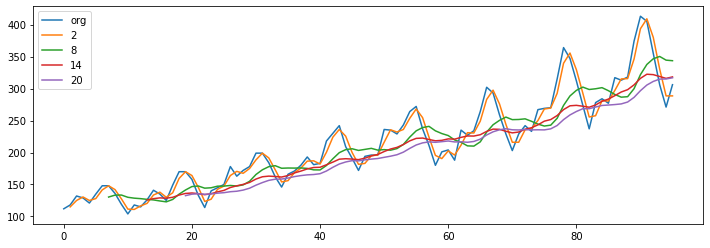

In [60]:
#Moving Average
plt.figure(figsize=(12,4))
data1.Passengers.plot(label="org")
for i in range(2,24,6):
    data1["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

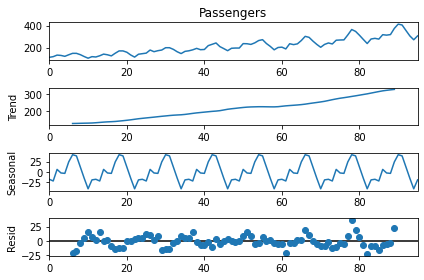

In [61]:
# Time series decomposition plot
decompose_ts_add = seasonal_decompose(data1.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

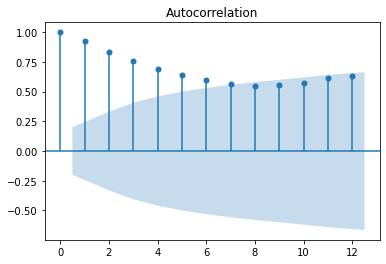

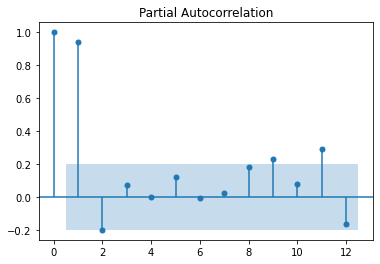

In [62]:
#ACF plots and PACF plots
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data1.Passengers,lags=12)
tsa_plots.plot_pacf(data1.Passengers,lags=12)
plt.show()

In [63]:
#Evaluation Metric MAPE
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [64]:
#Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers) 

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


13.411274740513823

In [65]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

<ipython-input-65-31e8e28b1106>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


23.53071965210049

In [66]:
#Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

5.495938663841666

In [67]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

2.821237608921072

# Final Model by combining train and test

In [68]:
hwe_model_mul_add = ExponentialSmoothing(data1["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [69]:
#Forecasting for next 10 time periods
hwe_model_mul_add.forecast(10)

96     312.899164
97     308.170903
98     355.533272
99     345.770384
100    345.697110
101    392.472018
102    436.501550
103    429.860620
104    380.172862
105    332.318642
dtype: float64

# Arima model Forecasting

In [70]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [71]:
series

,Passengers
Date,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


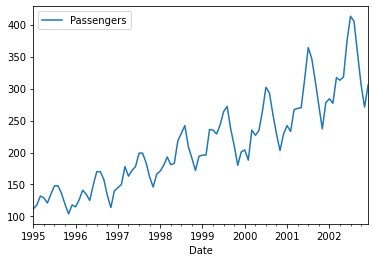

In [72]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
series.plot()
pyplot.show()

array([[<AxesSubplot:title={'center':'Passengers'}>]], dtype=object)

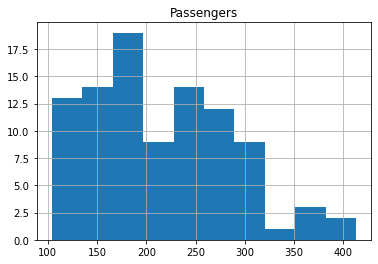

In [73]:
series.hist()

<AxesSubplot:ylabel='Density'>

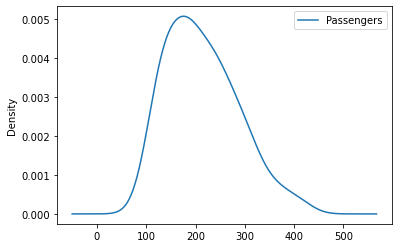

In [74]:
series.plot(kind='kde')

In [75]:
# separate out a validation dataset
split_point = len(series) - 10
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 86, Validation 10


# Persistence/ Base model

In [76]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [77]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>Predicted=259.000, Expected=229.000
>

# ARIMA Hyperparameters

In [78]:
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# Grid search for p,d,q values

In [79]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [80]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
#p_values = range(0, 5)
#d_values = range(0, 5)
#q_values = range(0, 5)
warnings.filterwarnings("ignore")
#evaluate_models(train.values, p_values, d_values, q_values)

# Build Model based on the optimized values

In [81]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [82]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

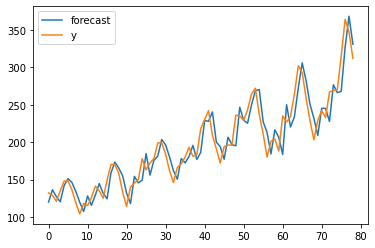

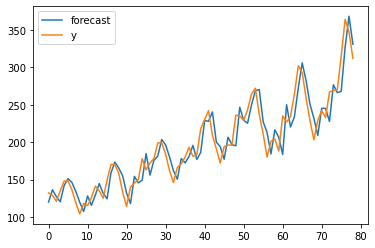

In [83]:
# fit model
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 79)

In [84]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

71.93698492463312

# Combine train and test data and build final mode

In [85]:
# fit model
data = read_csv('Airlines_Data.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [86]:
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()

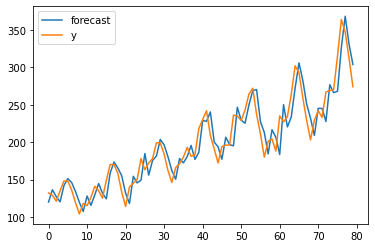

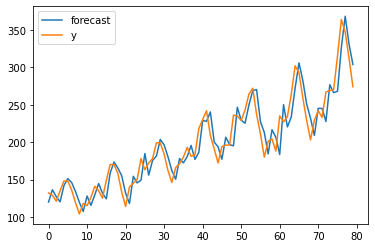

In [87]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,80)

In [88]:
forecast

array([271.5444422 , 272.96717823, 277.13673876, 280.43796091,
       282.22674611, 283.52404428, 285.09891935, 287.00430993,
       288.98786988, 290.89405295])